In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# load the data
df =  pd.read_csv('D:\myproject\Customer_Behaviour_Analysis\data\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.shape
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [3]:
# get the total number of customer who responded yes to our policy
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

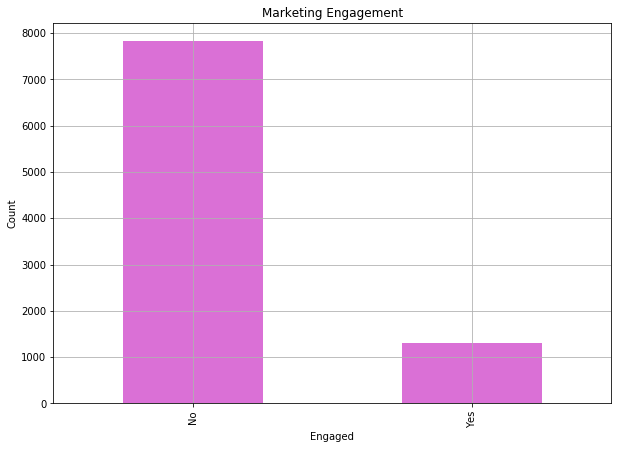

In [4]:
# visulalize this as bar plot

ax = df.groupby('Response').count()['Customer'].plot(
        kind='bar',
        color='orchid',
        grid=True,
        figsize=(10,7),
        title='Marketing Engagement'
        )

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [5]:
df.groupby('Response').count()['Gender']

Response
No     7826
Yes    1308
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

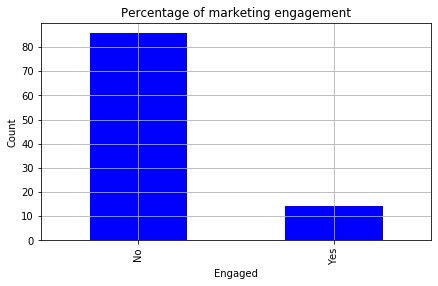

In [30]:
# calculate the percentage of customer who has responded. 
# df.shape[0] == number of row
# df,shape[1] == number of column

PercenatgeOfcustomer = df.groupby('Response').count()['Customer']/df.shape[0] * 100
PercenatgeOfcustomer 

px =  PercenatgeOfcustomer.plot(
        kind='bar',
        color ='blue',
        grid=True,
        figsize=(7,4),
        title='Percentage of marketing engagement'
        )
px.set_xlabel('Engaged')
px.set_ylabel('Count')

In [7]:
# Get the engagement rate per renewal offer type

by_offer_type_df = df.loc[
    df['Response'] == 'Yes', # count only customer who responded yes
].groupby([
    'Renew Offer Type'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

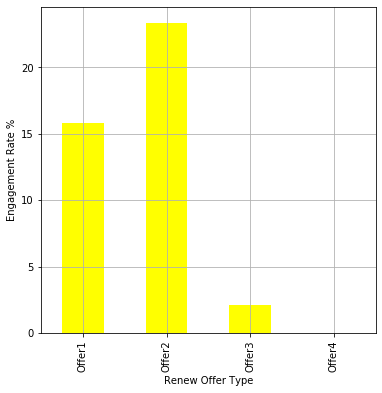

In [8]:
# visualize the graph related to engagement rate per renewal offer type

rx =(by_offer_type_df * 100).plot(
    kind='bar',
    figsize=(6,6),
    color='yellow',
    grid=True
)

rx.set_ylabel('Engagement Rate %')
plt.show()

In [9]:
# we can see that offer 2 has highest engagement rate

In [10]:
# we calculate the engagement rate by each offer type and vechicle class

by_offer_type_df = df.loc[
    df['Response'] == 'Yes'  # engaged customer
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/ df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [11]:
# unstack function is being used for output more readable
# 
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df 

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


Text(0, 0.5, 'Engagement rate %')

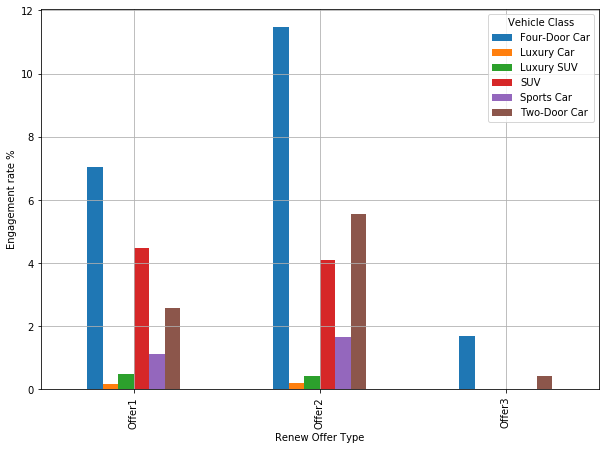

In [12]:
# visualize this data

ax = (by_offer_type_df * 100).plot(
kind = 'bar',
figsize=(10,7),
grid=True
)

ax.set_ylabel('Engagement rate %')

In [13]:
# We observe that four door car has highest engagement rate amongst all group.
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
# we calcualte how engagement differ by different sales channel

by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

by_offer_type_df 

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

Text(0, 0.5, 'Engagement rate %')

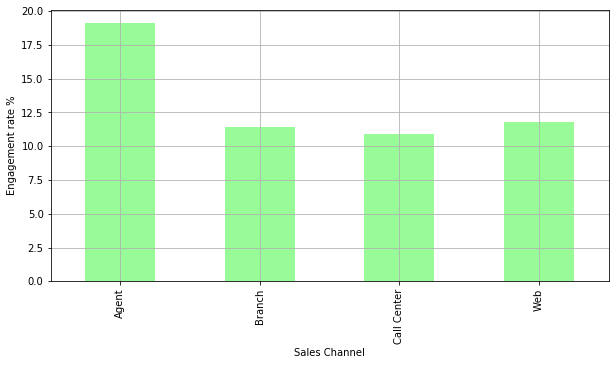

In [15]:
ax = (by_offer_type_df * 100).plot(
    kind='bar',
    figsize=(10,5),
    grid=True,
    color='palegreen'
)

ax.set_ylabel('Engagement rate %')

In [16]:
# we cab observe that Agent works better in terms of getting response from customser
#then sales through Web woekd second last.

In [17]:
# now we analyze whether customers with various vehicle sizes respond differently
# to different sales channel

In [18]:
by_sale_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel' , 'Vehicle Size'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

by_sale_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [19]:
by_sale_channel_df = by_sale_channel_df.unstack().fillna(0)  # used for format data
by_sale_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


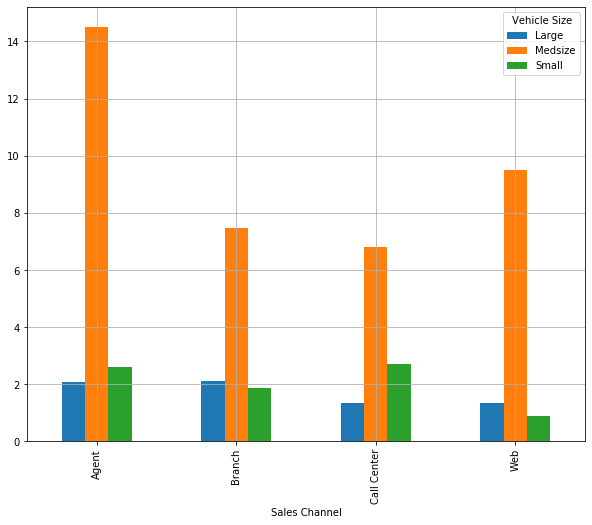

In [20]:
ax = (by_sale_channel_df * 100).plot(
    kind='bar',
    figsize=(10,8),
    grid=True
)

In [21]:
# we can observe that customer having medium size vehicle responded best to all type of sales channel. 

In [22]:
# by_offer_type_df = df.loc[
#     (df['Response'] == 'Yes' ) | (df['Response'] == 'No' ), # count only customer who responded yes
# ].groupby([
#     'Renew Offer Type'
# ]).count()['Customer']

# by_offer_type_df

In [23]:
# we can calculate the number of male and female who responded yes to policy.

by_gender_policy_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Gender' , 'Marital Status'
]).count()['Customer'] 


by_gender_policy_df 
by_gender_policy_df = by_gender_policy_df.unstack().fillna(0)
by_gender_policy_df

Marital Status,Divorced,Married,Single
Gender,,,
F,192,336,132
M,132,360,156


Text(0, 0.5, 'Engagement count in number')

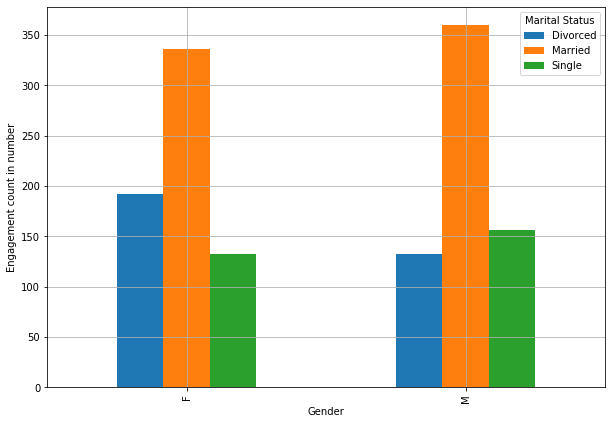

In [24]:
ax = by_gender_policy_df.plot(
    kind='bar',
    figsize=(10,7),
    grid=True
)

ax.set_ylabel('Engagement count in number')  

# we can observe that married person among both Male and Femal has highest engagement rate as comapre to other.



In [25]:
# Engagement rate by Months since policy Inception

by_months_since_inception = df.loc[
    df['Response'] == 'Yes'
].groupby(
    by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
    'Months Since Policy Inception'
)['Response'].count() * 100

by_months_since_inception

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6           NaN
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14          NaN
15    22.018349
16          NaN
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82          NaN
83    24.000000
84     6.000000
85    14.117647
86          NaN
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97          NaN
98          NaN
99     7.6

In [26]:
by_months_since_inception.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

Text(0, 0.5, 'Engagement rate (%)')

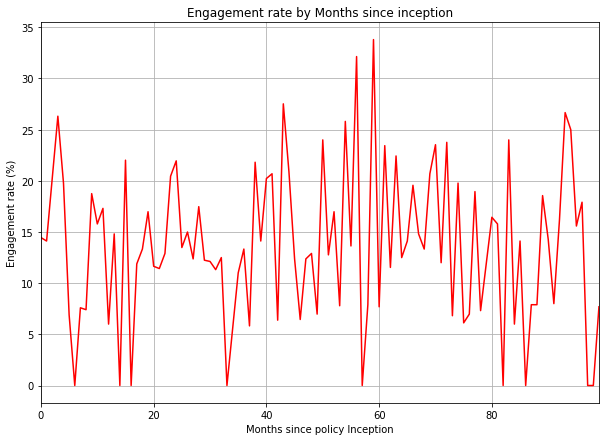

In [27]:
ax = by_months_since_inception.fillna(0).plot(
    figsize=(10,7),
    title='Engagement rate by Months since inception',
    grid=True,
    color='red'
)

ax.set_xlabel('Months since policy Inception')
ax.set_ylabel('Engagement rate (%)')

In [32]:
df.shape

(9134, 24)